# Datathon 

### World Trade Logistics

Logistics is a vital market in the globalized and connected world where we live. Coordinating the transport of the entire supply chain from where goods are produced until they reach the end customer is a complex task, which must be planned and executed correctly for the operation of trade, both local and global. 

Thanks to new tools such as the use of geolocators, digital records of entry and exit of distribution centers, different means of land, sea, and air transport, in addition to IoT tools throughout the supply and production chain, it is possible to accumulate a lot of data, which can be analyzed to optimize logistics processes.

### Description of the problem

We are part of a logistics company that works for an important E-Commerce portal, and our team leader gives us the task of implementing a model that allows us to predict if a shipment will arrive on time or not, according to the information contained in the dataset he made available to us, so we can pay attention and better follow up on those shipments that may cause problems.

### Steps

1. Selecting or downloading a dataset.
2. Data preparation and cleaning (EDA). 
3. Exploratory analysis and visualization (EDA).
4. Splitting a dataset into training, validation & test sets.
5. Filling/imputing missing values in numeric columns.
6. Scaling numeric features to a range.
7. Encoding categorical columns as one-hot vectors.
8. Saving Processed Data to Disk.

## Selecting or downloading a dataset.

In this dataton, we'll analyze a E-Commerce dataset:

* Use the urlretrieve function from pandas to read both files xlsx. 
* Use a helper library, e.g., openpyxl, that contains a helper function to read and transform to a dataframe.

First of all, We get a simple extension for Jupyter Notebook and Jupyter Lab to beautify Python code automatically using Black.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

Lets import the basic modules we are going to use.

In [2]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<IPython.core.display.Javascript object>

The following settings will improve the default style and font sizes for our charts.

In [3]:
import matplotlib

sns.set_style("darkgrid")  # Dark grid background
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"
pd.set_option("display.max_columns", None)  # To show all columns

<IPython.core.display.Javascript object>

## Data preparation and cleaning

Let's verify that the dataset is the forked repository and retrieve the list of files in the dataset.

In [4]:
import os

os.listdir("Datasets/")

['E-Commerce_train.xlsx', 'E-Commerce_test.xlsx']

<IPython.core.display.Javascript object>

Let's load the XLSX files using the Pandas library. We'll use the same name, appending *_df* to the data frame name to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [5]:
e_commerce_train_df = pd.read_excel("Datasets/E-Commerce_train.xlsx", index_col="ID")
e_commerce_test_df = pd.read_excel("Datasets/E-Commerce_test.xlsx", index_col="ID")

<IPython.core.display.Javascript object>

* <mark>We use read_excel using openpyxl to load the data and as a parameter index_col ID.</mark>

Lest verify the shape of both data frames

In [6]:
print("e_commerce_train_df.shape:", e_commerce_train_df.shape)
print("e_commerce_test_df.shape:", e_commerce_test_df.shape)

e_commerce_train_df.shape: (8999, 11)
e_commerce_test_df.shape: (2000, 10)


<IPython.core.display.Javascript object>

Let's get a sample of the data from the training data frame to get.

In [7]:
e_commerce_train_df.sample(5)

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
ID                                                                            
461                C             Ship                    4                1   
6708               F             Road                    3                1   
8145               A             Ship                    4                5   
929                C             Ship                    3                2   
8610               F             Road                    5                2   

      Cost_of_the_Product  Prior_purchases Product_importance Gender  \
ID                                                                     
461                   202                3             medium      F   
6708                  186                2             medium      F   
8145                  266                3             medium      F   
929                   180                4             medium      M   
8610                  221                6             medium      M   

      Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
ID                                                          
461                 18           3940                    1  
6708                 7           4556                    0  
8145                 2           4867                    0  
929                 55           1165                    1  
8610                 4           1952                    1

<IPython.core.display.Javascript object>

Let's view some basic information about the two data frames.

In [8]:
e_commerce_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 1 to 8999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8999 non-null   object
 1   Mode_of_Shipment     8999 non-null   object
 2   Customer_care_calls  8999 non-null   int64 
 3   Customer_rating      8999 non-null   int64 
 4   Cost_of_the_Product  8999 non-null   int64 
 5   Prior_purchases      8999 non-null   int64 
 6   Product_importance   8999 non-null   object
 7   Gender               8999 non-null   object
 8   Discount_offered     8999 non-null   int64 
 9   Weight_in_gms        8999 non-null   int64 
 10  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 843.7+ KB


<IPython.core.display.Javascript object>

* <mark>There are not mistreat datatypes.</mark>

In [9]:
e_commerce_train_df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

<IPython.core.display.Javascript object>

* <mark>Not null NaN or empy values.</mark>

### E Commerce test

Now let's get a sample of the data from the testing data frame.

In [10]:
e_commerce_test_df.sample(5)

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
ID                                                                             
9933                A             Ship                    4                2   
9691                D             Ship                    5                4   
10126               B             Road                    4                1   
10525               D             Road                    3                5   
9516                F             Ship                    3                1   

       Cost_of_the_Product  Prior_purchases Product_importance Gender  \
ID                                                                      
9933                   228                5                low      F   
9691                   221                5                low      F   
10126                  147                2                low      M   
10525                  188                3               high      F   
9516                   150                2                low      F   

       Discount_offered  Weight_in_gms  
ID                                      
9933                  3           1473  
9691                  8           1927  
10126                 8           4600  
10525                 6           4234  
9516                  6           5697

<IPython.core.display.Javascript object>

Let's view some basic information about the two data frames.

In [11]:
e_commerce_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 9000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      2000 non-null   object
 1   Mode_of_Shipment     2000 non-null   object
 2   Customer_care_calls  2000 non-null   int64 
 3   Customer_rating      2000 non-null   int64 
 4   Cost_of_the_Product  2000 non-null   int64 
 5   Prior_purchases      2000 non-null   int64 
 6   Product_importance   2000 non-null   object
 7   Gender               2000 non-null   object
 8   Discount_offered     2000 non-null   int64 
 9   Weight_in_gms        2000 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 171.9+ KB


<IPython.core.display.Javascript object>

* <mark>There are not mistreat datatypes.</mark>

In [12]:
e_commerce_test_df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

<IPython.core.display.Javascript object>

* <mark>Not null NaN or empy values.</mark>

## Exploratory analysis and visualization.

Before we ask the question about the prediction, it would help to understand to explore all the variables to understand how they behave for this task. We are going to work with the training dataset.

Let's view the list of columns in the data frame.

In [13]:
list(e_commerce_train_df.columns)

['Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

<IPython.core.display.Javascript object>

Let's now view some basic statistics about numeric columns.

In [14]:
e_commerce_train_df.describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count          8999.000000      8999.000000          8999.000000   
mean              4.015113         2.994999           208.561507   
std               1.138934         1.413143            48.289172   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           168.000000   
50%               4.000000         3.000000           211.000000   
75%               5.000000         4.000000           249.500000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count      8999.000000       8999.000000    8999.000000          8999.000000  
mean          3.511501         15.097678    3584.364596             0.635515  
std           1.532074         17.400040    1614.750194             0.481312  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1857.000000             0.000000  
50%           3.000000          8.000000    4046.000000             1.000000  
75%           4.000000         19.000000    4999.500000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

<IPython.core.display.Javascript object>

Let's check the the categories unique values.

In [15]:
print("Warehouse_block options:", e_commerce_train_df["Warehouse_block"].unique())
print("Mode_of_Shipment options:", e_commerce_train_df["Mode_of_Shipment"].unique())
print("Product_importance options:", e_commerce_train_df["Product_importance"].unique())
print("Gender options:", e_commerce_train_df["Gender"].unique())

Warehouse_block options: ['D' 'F' 'A' 'B' 'C']
Mode_of_Shipment options: ['Flight' 'Ship' 'Road']
Product_importance options: ['low' 'medium' 'high']
Gender options: ['F' 'M']


<IPython.core.display.Javascript object>

Let's visualized the correlation matrix using a heatmap. Corr. is a method called to compute the correlation coefficients between all pairs of numeric columns.

Text(0.5, 1.0, 'Correlation Matrix')

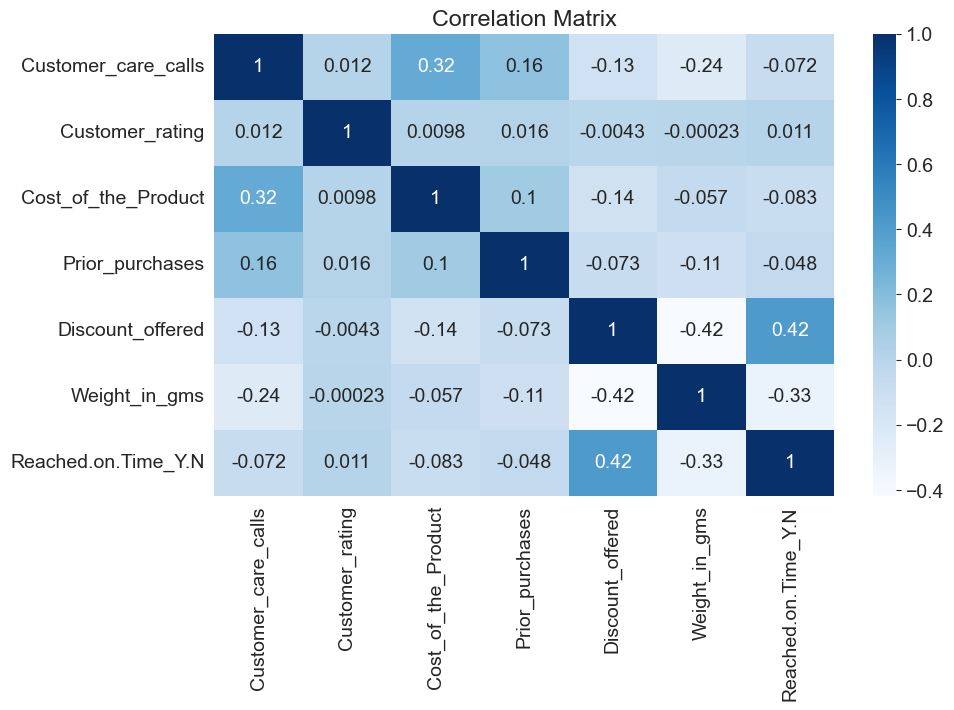

<IPython.core.display.Javascript object>

In [16]:
sns.heatmap(e_commerce_train_df.corr(), cmap="Blues", annot=True)
plt.title("Correlation Matrix")

* <mark>The variables with the highest correlation with **Reached.on.Time_Y.N** is **Discount_offered** that correlation is shown in the graph.</mark>

Let's check a pairplot plot to get the hole perspective of the data:

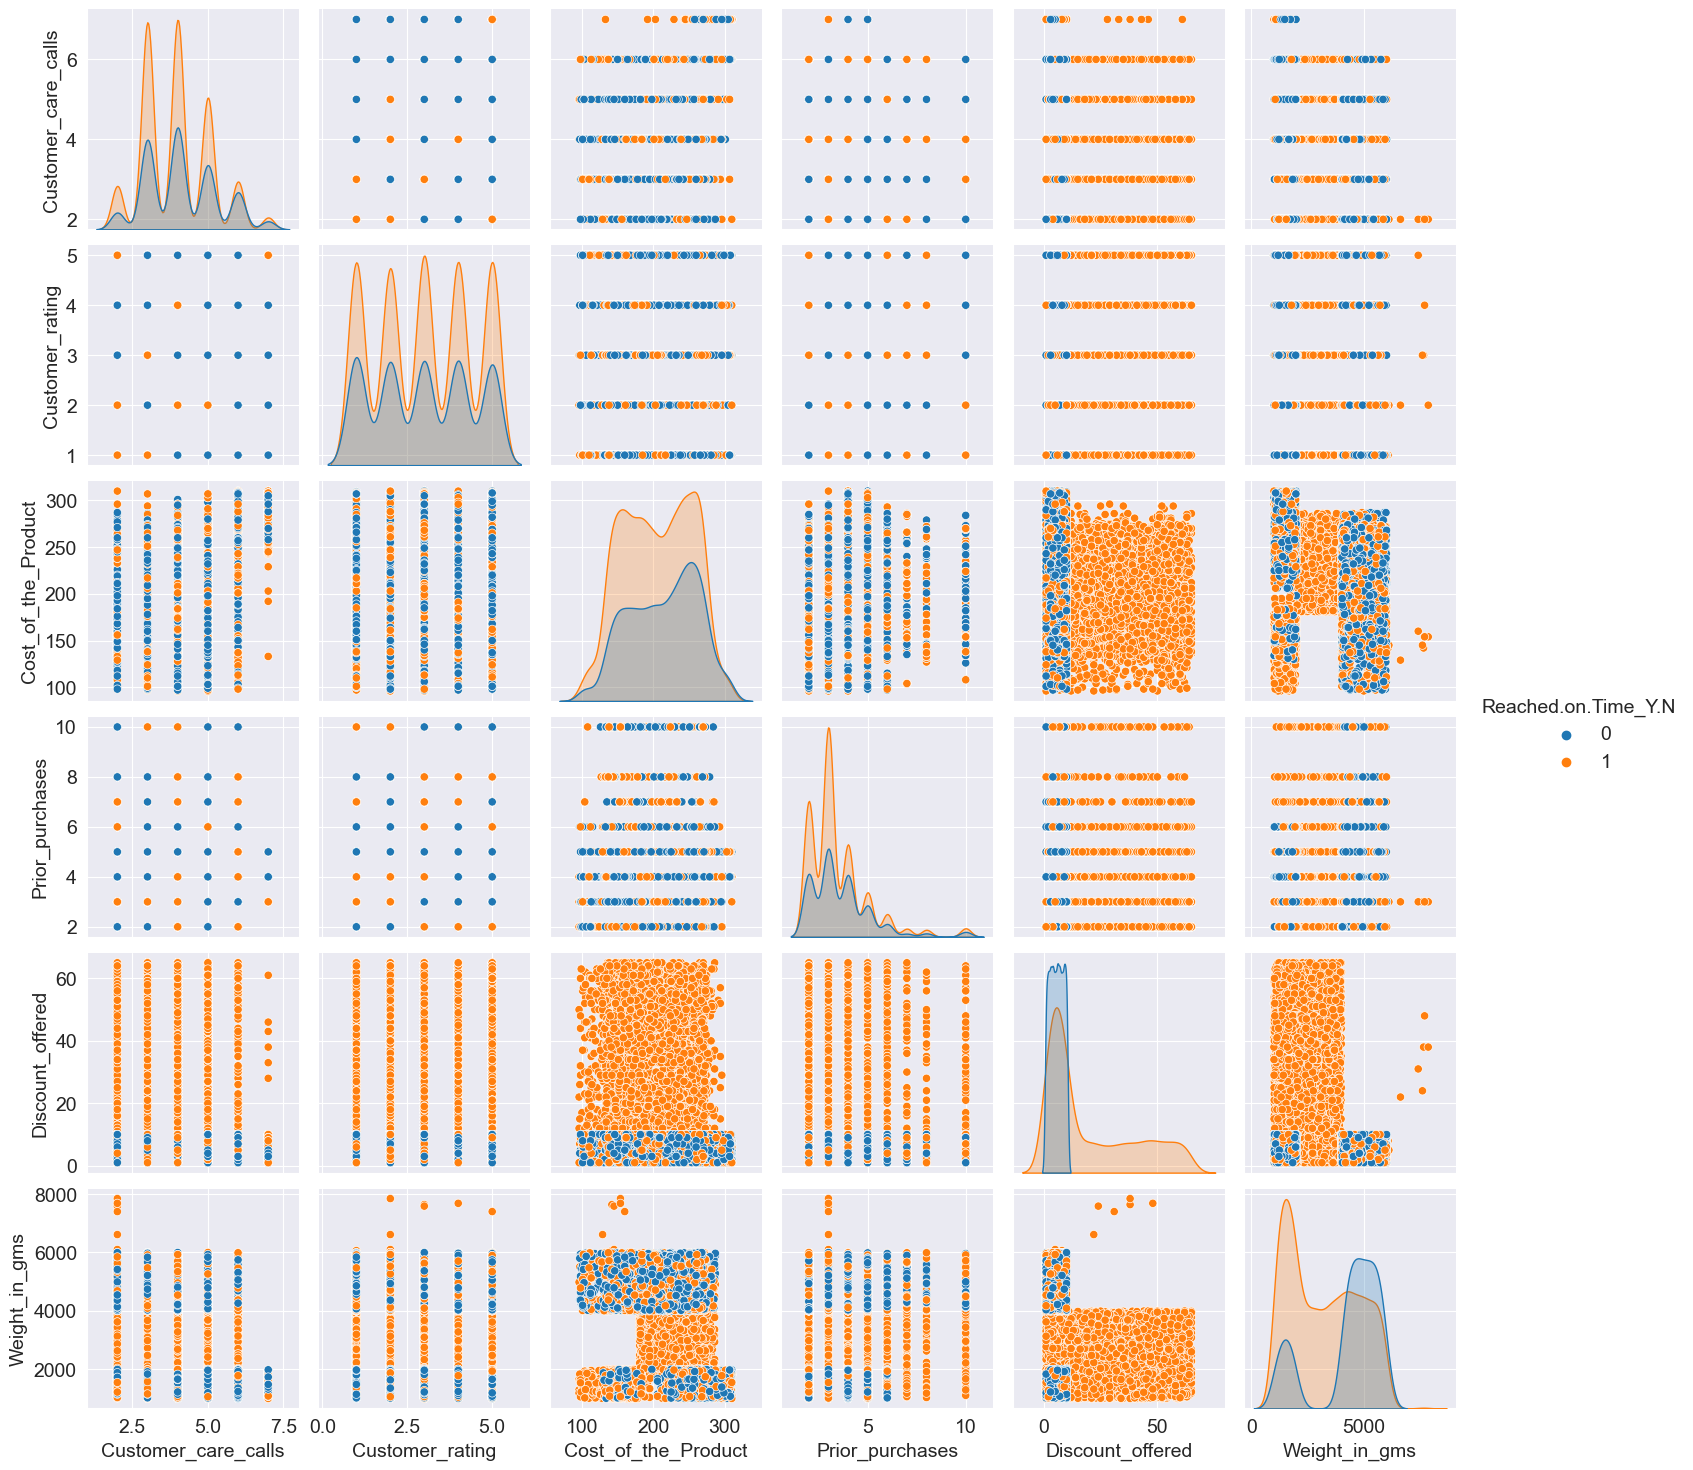

<IPython.core.display.Javascript object>

In [25]:
sns.pairplot(e_commerce_train_df, hue="Reached.on.Time_Y.N")

* <mark>There are lots of unusual graphis that are very interesting i.e. **Cost_of_the_Product vs Discount_offered**, **Cost_of_the_Product vs Weight_in_gms**.</mark>

Let's check and review some of the plots.

**Reached on time classes is used to categorize the Cost of the Product vs Weight (gms) in a scatter plot graph.**

In [17]:
px.scatter(
    e_commerce_train_df,
    x="Weight_in_gms",
    y="Cost_of_the_Product",
    color="Reached.on.Time_Y.N",
    title="Cost of the Product vs Weight (gms)",
)

<IPython.core.display.Javascript object>

* <mark>We observe that when the cost of the product is over 180 and between 2000 gms and 4000 gms, all packages might arrive on time.</mark>
* <mark>There is a higher probability that a package may not arrive on time if the cost of the product is higher and between 1000 gms and 2000 gms.</mark>
* <mark>Also, there are highly chances that a package may not arrive on time if the weight is in the range of 4000 gms and 6000 gms.</mark>
* <mark>All outliers are on time.</mark>

**Reached on time classes is used to categorize a distribution graph about Warehouse Block.**

In [18]:
px.histogram(
    e_commerce_train_df,
    x="Warehouse_block",
    color="Reached.on.Time_Y.N",
    marginal="box",
    text_auto=True,
    title="Distribution of Warehouse Block",
)

<IPython.core.display.Javascript object>

**Reached on time classes is used to categorize a distribution graph about Customer Care Calls.**

In [19]:
px.histogram(
    e_commerce_train_df,
    x="Customer_care_calls",
    color="Reached.on.Time_Y.N",
    marginal="box",
    text_auto=True,
    title="Distribution of Customer Care Calls",
)

<IPython.core.display.Javascript object>

#### Customer Care Calls is used to categorize the cost of the product in a distribution graph. 

In [20]:
px.histogram(
    e_commerce_train_df,
    x="Cost_of_the_Product",
    color="Customer_care_calls",
    marginal="box",
    text_auto=True,
    title="Distribution of Cost of the Product",
)

<IPython.core.display.Javascript object>

**Reached on time classes is used to categorize a distribution plot graph of Prior_purchases by the Customer Care Calls as the Y axis.**

In [21]:
px.histogram(
    e_commerce_train_df,
    x="Prior_purchases",
    y="Customer_care_calls",
    color="Reached.on.Time_Y.N",
    marginal="box",
    text_auto=True,
    title="Distribution of Prior_purchases taking the sum of the Customer care Calls",
)

<IPython.core.display.Javascript object>

**Reached on time classes is used to categorize a distribution of Discount_offered by the Cost of the Product.**

In [22]:
px.histogram(
    e_commerce_train_df,
    x="Discount_offered",
    y="Cost_of_the_Product",
    color="Reached.on.Time_Y.N",
    marginal="box",
    title="Distribution of Discount_offered by the Cost of the Product",
)

<IPython.core.display.Javascript object>

**Product importance classes is used to categorize a histogram about the Customer Care Calls.**

In [23]:
px.histogram(
    e_commerce_train_df,
    x="Customer_care_calls",
    color="Product_importance",
    hover_data=["Reached.on.Time_Y.N"],
    marginal="box",
    text_auto=True,
    title="Product importance vs Customer Care Calls",
)

<IPython.core.display.Javascript object>

**Reached on time classes is used to categorize a bar plot graph using the Gender vs the Cost of the Product.** 

<AxesSubplot:xlabel='Gender', ylabel='Cost_of_the_Product'>

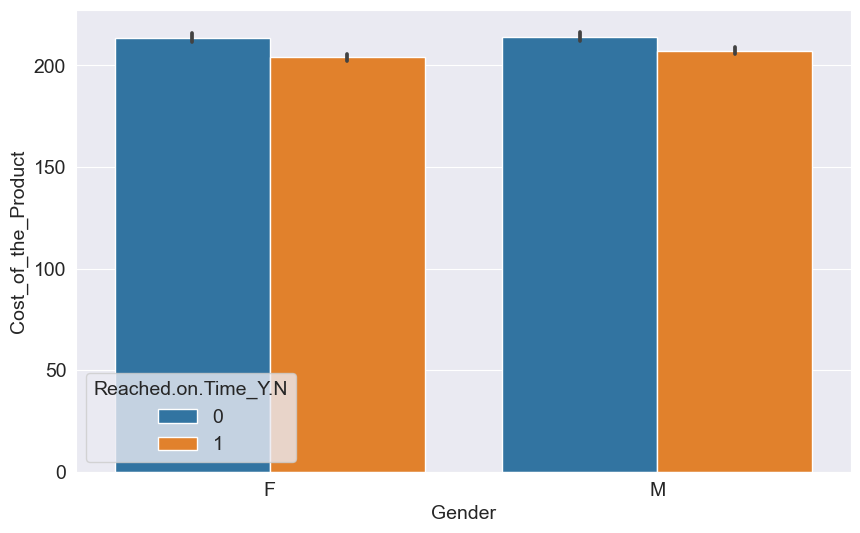

<IPython.core.display.Javascript object>

In [24]:
sns.barplot(
    data=e_commerce_train_df,
    x="Gender",
    y="Cost_of_the_Product",
    hue="Reached.on.Time_Y.N",
)

**This is a histogram graph showing the Weight (gms) vs the Discount offered categorized by the classes in Reached on Time.**

In [25]:
px.histogram(
    e_commerce_train_df,
    x="Weight_in_gms",
    y="Discount_offered",
    color="Reached.on.Time_Y.N",
    marginal="box",
    nbins=40,
    text_auto=True,
    title="Weight_in_gms vs. Discount_offered",
)

<IPython.core.display.Javascript object>

### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning.

<img src="https://i.imgur.com/1EMQmAw.png" width="480">

* <mark>But first let's treat the data before we apply the model.</mark>

## Splitting a dataset into training, validation & test sets

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.
2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.

<img src="https://i.imgur.com/j8eITrK.png" width="480">

We have our training set (e_commerce_train) from which we are going to extract the validation set. The test set has already been given (e_commerce_test). We are going to use a 75%-25% training-validation split.

In [26]:
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [27]:
train_df, val_df = train_test_split(
    e_commerce_train_df, test_size=0.25, random_state=527
)
test_df = e_commerce_test_df.copy()

<IPython.core.display.Javascript object>

In [28]:
print("train_df.shape:", train_df.shape)
print("val_df.shape:", val_df.shape)
print("test_df.shape:", test_df.shape)

train_df.shape: (6749, 11)
val_df.shape: (2250, 11)
test_df.shape: (2000, 10)


<IPython.core.display.Javascript object>

### Identifying Input and Target Columns

Let's create a list of input columns, and also identify the target column.

In [29]:
input_cols = list(train_df.columns)[:-1]
target_col = "Reached.on.Time_Y.N"

<IPython.core.display.Javascript object>

In [30]:
print("input_cols:", input_cols)
print("target_col:", target_col)

input_cols: ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms']
target_col: Reached.on.Time_Y.N


<IPython.core.display.Javascript object>

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [31]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

<IPython.core.display.Javascript object>

In [32]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

<IPython.core.display.Javascript object>

In [33]:
test_inputs = test_df[input_cols].copy()
test_targets = None

<IPython.core.display.Javascript object>

### Identify numerical and categorical columns.

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [34]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes("object").columns.tolist()

<IPython.core.display.Javascript object>

In [35]:
print("numeric_cols:", numeric_cols)
print("categorical_col:", categorical_cols)

numeric_cols: ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
categorical_col: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


<IPython.core.display.Javascript object>

In [36]:
train_inputs[numeric_cols].describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count          6749.000000      6749.000000          6749.000000   
mean              4.018373         3.010372           208.783375   
std               1.141690         1.405767            48.399823   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           168.000000   
50%               4.000000         3.000000           210.000000   
75%               5.000000         4.000000           250.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  
count      6749.000000       6749.000000    6749.000000  
mean          3.502445         15.124018    3580.514743  
std           1.510348         17.435805    1611.037165  
min           2.000000          1.000000    1001.000000  
25%           3.000000          4.000000    1859.000000  
50%           3.000000          8.000000    4038.000000  
75%           4.000000         19.000000    4995.000000  
max          10.000000         65.000000    7684.000000

<IPython.core.display.Javascript object>

In [37]:
train_inputs[categorical_cols].nunique()

Warehouse_block       5
Mode_of_Shipment      3
Product_importance    3
Gender                2
dtype: int64

<IPython.core.display.Javascript object>

Before imputing, scaling, or encoding data, lest concat the entire dataset to get accuracy in statistics.

In [38]:
raw_numeric_cols_df = pd.concat(
    [train_df[numeric_cols], val_df[numeric_cols], test_df[numeric_cols]],
    axis=0,
    ignore_index=True,
).copy()

<IPython.core.display.Javascript object>

In [39]:
raw_categorical_cols_df = pd.concat(
    [train_df[categorical_cols], val_df[categorical_cols], test_df[categorical_cols]],
    axis=0,
    ignore_index=True,
).copy()

<IPython.core.display.Javascript object>

Check the shape of each new total raw data

In [40]:
print("raw_numeric_cols_df.shape:", raw_numeric_cols_df.shape)
print("raw_categorical_cols_df.shape:", raw_categorical_cols_df.shape)

raw_numeric_cols_df.shape: (10999, 6)
raw_categorical_cols_df.shape: (10999, 4)


<IPython.core.display.Javascript object>

## Filling/imputing missing values in numeric columns

Machine learning models can't work with missing numerical data. The process of filling in missing values is called imputation. We had already checked previous data for null or NaN values, but we needed to double-check.

In [41]:
train_inputs[numeric_cols + categorical_cols].isna().sum()

Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
Warehouse_block        0
Mode_of_Shipment       0
Product_importance     0
Gender                 0
dtype: int64

<IPython.core.display.Javascript object>

* <mark>There are not null or NaN so we are going to skip this step.</mark>

## Scaling numeric features to a range.

Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

In [42]:
from sklearn.preprocessing import MinMaxScaler

<IPython.core.display.Javascript object>

First, we instate the class and then we fit the scaler to the data using the numeric columns.

In [43]:
scaler = MinMaxScaler()

<IPython.core.display.Javascript object>

In [44]:
scaler.fit(raw_numeric_cols_df[numeric_cols])

MinMaxScaler()

<IPython.core.display.Javascript object>

In [45]:
print("scaler.data_min_:", list(scaler.data_min_))
print("scaler.data_max_:", list(scaler.data_max_))

scaler.data_min_: [2.0, 1.0, 96.0, 2.0, 1.0, 1001.0]
scaler.data_max_: [7.0, 5.0, 310.0, 10.0, 65.0, 7846.0]


<IPython.core.display.Javascript object>

Let's check if they are correct for the entire dataset before the transform.

In [46]:
raw_numeric_cols_df.describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  
count     10999.000000      10999.000000   10999.000000  
mean          3.567597         13.373216    3634.016729  
std           1.522860         16.205527    1635.377251  
min           2.000000          1.000000    1001.000000  
25%           3.000000          4.000000    1839.500000  
50%           3.000000          7.000000    4149.000000  
75%           4.000000         10.000000    5050.000000  
max          10.000000         65.000000    7846.000000

<IPython.core.display.Javascript object>

We can now separately scale the training, validation and test sets using the transform method of scaler.

In [47]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

<IPython.core.display.Javascript object>

Let's check if the transformation has been made.

In [48]:
train_inputs[numeric_cols].describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count          6749.000000      6749.000000          6749.000000   
mean              0.403675         0.502593             0.527025   
std               0.228338         0.351442             0.226167   
min               0.000000         0.000000             0.000000   
25%               0.200000         0.250000             0.336449   
50%               0.400000         0.500000             0.532710   
75%               0.600000         0.750000             0.719626   
max               1.000000         1.000000             1.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  
count      6749.000000       6749.000000    6749.000000  
mean          0.187806          0.220688       0.376847  
std           0.188794          0.272434       0.235360  
min           0.000000          0.000000       0.000000  
25%           0.125000          0.046875       0.125347  
50%           0.125000          0.109375       0.443682  
75%           0.250000          0.281250       0.583492  
max           1.000000          1.000000       0.976333

<IPython.core.display.Javascript object>

## Encoding categorical columns as one-hot vectors.

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. We are going to use the mosts common technique ONE-HOT-ENCODING for categorical columns because for: 

1. Warehouse_block  we have 5 categories.
2. Mode_of_Shipment we have 3 categories.
3. Product_importance we have 3 categories.
4. Gender we have 2 categories.

In [49]:
print(
    "Warehouse_block categories:",
    list(raw_categorical_cols_df["Warehouse_block"].unique()),
)
print(
    "Mode_of_Shipment categories:",
    list(raw_categorical_cols_df["Mode_of_Shipment"].unique()),
)
print(
    "Product_importance categories:",
    list(raw_categorical_cols_df["Product_importance"].unique()),
)
print(
    "Gender categories:",
    list(raw_categorical_cols_df["Gender"].unique()),
)

Warehouse_block categories: ['B', 'F', 'D', 'A', 'C']
Mode_of_Shipment categories: ['Ship', 'Road', 'Flight']
Product_importance categories: ['high', 'low', 'medium']
Gender categories: ['F', 'M']


<IPython.core.display.Javascript object>

In [50]:
from sklearn.preprocessing import OneHotEncoder

<IPython.core.display.Javascript object>

First, we instate the class and then fit the encoder to the data and identify the full list of categories across all categorical columns.

In [51]:
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

<IPython.core.display.Javascript object>

In [52]:
encoder.fit(raw_categorical_cols_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

<IPython.core.display.Javascript object>

Check if the encoder categorical list matches the unique values for the categorical columns.

In [53]:
encoder.categories_

[array(['A', 'B', 'C', 'D', 'F'], dtype=object),
 array(['Flight', 'Road', 'Ship'], dtype=object),
 array(['high', 'low', 'medium'], dtype=object),
 array(['F', 'M'], dtype=object)]

<IPython.core.display.Javascript object>

In [54]:
encoded_cols = list(encoder.get_feature_names_out())
encoded_cols

['Warehouse_block_A',
 'Warehouse_block_B',
 'Warehouse_block_C',
 'Warehouse_block_D',
 'Warehouse_block_F',
 'Mode_of_Shipment_Flight',
 'Mode_of_Shipment_Road',
 'Mode_of_Shipment_Ship',
 'Product_importance_high',
 'Product_importance_low',
 'Product_importance_medium',
 'Gender_F',
 'Gender_M']

<IPython.core.display.Javascript object>

To perform the encoding, we use the transform method of encoder.

In [55]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<IPython.core.display.Javascript object>

Check if the shape of all train, val, and test has changed. (including scalin and encoding).

In [56]:
print("train_inputs_shape:", train_inputs.shape)
print("val_inputs_shape:", val_inputs.shape)
print("test_inputs_shape:", test_inputs.shape)

train_inputs_shape: (6749, 23)
val_inputs_shape: (2250, 23)
test_inputs_shape: (2000, 23)


<IPython.core.display.Javascript object>

Let's check if the encoder has been performed correctly.

In [57]:
train_inputs.sample(5)

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
ID                                                                            
5787               A             Ship                  0.8             1.00   
3254               F             Ship                  0.2             0.50   
6749               C             Ship                  0.0             0.00   
811                D             Road                  0.6             0.50   
8825               C             Ship                  0.6             0.25   

      Cost_of_the_Product  Prior_purchases Product_importance Gender  \
ID                                                                     
5787             0.808411            0.250                low      M   
3254             0.649533            0.125             medium      F   
6749             0.710280            0.500                low      F   
811              0.560748            0.125             medium      F   
8825             0.738318            0.500                low      M   

      Discount_offered  Weight_in_gms  Warehouse_block_A  Warehouse_block_B  \
ID                                                                            
5787          0.062500       0.038422                1.0                0.0   
3254          0.140625       0.465303                0.0                0.0   
6749          0.015625       0.610811                0.0                0.0   
811           0.000000       0.209350                0.0                0.0   
8825          0.062500       0.129145                0.0                0.0   

      Warehouse_block_C  Warehouse_block_D  Warehouse_block_F  \
ID                                                              
5787                0.0                0.0                0.0   
3254                0.0                0.0                1.0   
6749                1.0                0.0                0.0   
811                 0.0                1.0                0.0   
8825                1.0                0.0                0.0   

      Mode_of_Shipment_Flight  Mode_of_Shipment_Road  Mode_of_Shipment_Ship  \
ID                                                                            
5787                      0.0                    0.0                    1.0   
3254                      0.0                    0.0                    1.0   
6749                      0.0                    0.0                    1.0   
811                       0.0                    1.0                    0.0   
8825                      0.0                    0.0                    1.0   

      Product_importance_high  Product_importance_low  \
ID                                                      
5787                      0.0                     1.0   
3254                      0.0                     0.0   
6749                      0.0                     1.0   
811                       0.0                     0.0   
8825                      0.0                     1.0   

      Product_importance_medium  Gender_F  Gender_M  
ID                                                   
5787                        0.0       0.0       1.0  
3254                        1.0       1.0       0.0  
6749                        0.0       1.0       0.0  
811                         1.0       1.0       0.0  
8825                        0.0       0.0       1.0

<IPython.core.display.Javascript object>

## Saving Processed Data to Disk.

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes. Lets check if the data is correct.

In [58]:
print("train_inputs:", train_inputs.shape)
print("train_targets:", train_targets.shape)
print("val_inputs:", val_inputs.shape)
print("val_targets:", val_targets.shape)
print("test_inputs:", test_inputs.shape)
print("test_targets:", test_targets)

train_inputs: (6749, 23)
train_targets: (6749,)
val_inputs: (2250, 23)
val_targets: (2250,)
test_inputs: (2000, 23)
test_targets: None


<IPython.core.display.Javascript object>

In [59]:
train_inputs.to_parquet(
    "Datawarehouse/train_inputs.parquet",
)
val_inputs.to_parquet("Datawarehouse/val_inputs.parquet")
test_inputs.to_parquet("Datawarehouse/test_inputs.parquet")

<IPython.core.display.Javascript object>

In [60]:
pd.DataFrame(train_targets).to_parquet("Datawarehouse/train_targets.parquet")
pd.DataFrame(val_targets).to_parquet("Datawarehouse/val_targets.parquet")
# pd.DataFrame(test_targets).to_parquet("Datawarehouse/test_targets.parquet")

<IPython.core.display.Javascript object>

We can use the joblib module to save and load Python objects on the disk.

In [61]:
import joblib

<IPython.core.display.Javascript object>

Let's first create a dictionary containing all the required objects.

In [62]:
eda_basics_features = {
    "input_cols": input_cols,
    "target_col": target_col,
    "numeric_cols": numeric_cols,
    "categorical_cols": categorical_cols,
    "encoded_cols": encoded_cols,
}

<IPython.core.display.Javascript object>

We can now save this to a file using joblib.dump

In [63]:
joblib.dump(eda_basics_features, "eda_basics_features.joblib")

['eda_basics_features.joblib']

<IPython.core.display.Javascript object>